Neste exercício vamos trabalhar com a base de dados de identificação de atividade humana com smartphones. Smartphones possuem acelerômetro e giroscópio, que registram dados de aceleração e giro nos eixos X, Y e Z, com frequencia de 50 Hz (ou seja, 50 registros por segundo). Os dados foram agrupados a medidas de 0.3 Hz, calculando-se variáveis derivadas como aceleração mínima, máxima, média etc por eixo no período agrupado de tempo, resultando em 561 variáveis que podem ser lidas nas bases disponíveis.

A base é oriunda de um experimento, em que os indivíduos realizavam uma de seis atividades corriqueiras:
- andando
- subindo escada
- descendo escada
- parado
- sentado
- deitado

O objetivo é classificar a atividade humana com base nos dados do acelerômetro e giroscópio do celular.

### 1. Carregar a base

Sua primeira atividade é carregar a base.

Ela está disponível neste link:
https://archive.ics.uci.edu/ml/datasets/human+activity+recognition+using+smartphones

dados https://archive.ics.uci.edu/ml/machine-learning-databases/00240/  
dataset.names https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.names  
UCI HAR Dataset.zip https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.zip

Você vai encontrar os seguintes arquivos:

- **features.txt:** contém a lista com os nomes das variáveis
- **features_info.txt:** contém a descrição das variáveis
- **README.txt:** contém uma descrição do estudo e das bases
- **activity_labels:** contém o código da atividade (inteiro entre 1 e 6) e a descrição
- **subject_train.txt:** uma lista indicando que registro pertence a que indivíduo na base de treino
- **X_train.txt:** as *features* (ou variáveis explicativas) da base de testes. Cada linha representa um registro das informações de um indivíduo em um intervalo de tempo de aproximadamente 1/0.3 segundo. As medidas estão em ordem temporal dentro do estudo, e o indivíduo que originou a medida está identificado na base subject_train.txt.
- **y_train.txt:** Possui o mesmo número de linhas que X_test. Contém um número de 1 a 6 indicando a atividade que estava sendo realizada por aquele registro na base de treino.
- **subject_test.txt:** uma lista indicando que registro pertence a que indivíduo na base de teste
- **X_test.txt:** as *features* (ou variáveis explicativas) da base de testes. Cada linha representa um registro das informações de um indivíduo em um intervalo de tempo de aproximadamente 1/0.3 segundo. As medidas estão em ordem temporal dentro do estudo, e o indivíduo que originou a medida está identificado na base subject_test.txt.
- **y_test.txt:** Possui o mesmo número de linhas que X_train. Contém um número de 1 a 6 indicando a atividade que estava sendo realizada por aquele registro na base de teste.

Carregue as bases:

1. Faça o download dos arquivos.
2. Carregue a base ```features.txt``` em uma *Series* (por exemplo usando o comando ```pd.read_csv()```.
3. Carregue a base subject_train.txt em uma *Series*
4. Carregue a base X_train.txt
    1. Faça com que as colunas deste *dataframe* tenham os nomes indicados em ```features.txt```
    2. Sem alterar a ordem dos *dataframes*, coloque o indicador do indivíduo lido em ```subject_train.txt``` como uma variável a mais neste *dataframe***
    3. Faça com que este *dataframe* tenha um índice duplo, composto pela ordem dos dados e pelo identificador do indivíduo
5. Com a mesma lógica, carregue a base X_test
    1. Certifique-se de que tenha os nomes lidos em ```features.txt```
    2. Coloque o identificador do sujeito lido em ```subject_test.txt```
    3. Defina um índice duplo composto pela ordem do registro e o identificador do registro
6. Salve as bases em arquivos CSV para facilitar a leitura deles na terefa 2 deste módulo
7. Considere que esta base é maior que a da aula, tanto em linhas quanto em colunas. Selecione apenas as três primeiras colunas da base ('tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y' e 'tBodyAcc-mean()-Z'), para efeitos desse exercício.

**OBS:** As bases já estão divididas em treino e teste, de modo que não vamos precisar da função ```train_test_split```.

### 2. Ajustar uma árvore de decisão

- 2.1 ajuste uma árvore de decisão com número mínimo de observações por folha = 20. Certifique-se de que você esteja utilizando apenas as 3 variáveis indicadas no exercício anterior.
- 2.2 Calcule os ccp_alphas. Como feito em aula, certifique-se de que todos os valores são positivos, e selecione apenas valores únicos.
- 2.3 Considere que vamos fazer uma árvore para cada valor de ```ccp_alpha```. Para ter um pouco mais de velocidade, crie uma coleção de dados com os ```ccp_alphas```, considerando apenas 1 a cada 5 valores. Dica: utilize o slicing do tipo ```array[::5]``` para isto. Caso se sinta seguro, fique à vontade para utilizar mais valores de ```ccp_alpha```.

### 3. Desempenho da árvore por ccp_alpha

- 3.1: Rode uma árvore para cada ```ccp_alpha```, salvando cada árvore em uma lista
- 3.2: Calcule a acurácia de cada árvore na base de treinamento e de teste
- 3.3: Monte um gráfico da acurácia em função do ```ccp_alpha``` na base de validação e na base de teste
- 3.4: Selecione a melhor árvore como sendo aquela que possui melhor acurácia na base de teste
- 3.5: Qual a melhor acurácia que se pode obter com estas três variáveis?

**Dica:** utilize a estrutura do notebook apresentado em aula.  
**Dica 2:** meça o tempo com a função mágica ```%%time``` na primeira linha da célula.  
**Sugestão:** caso fique confortável com o tempo de execução, faça a busca pelo melhor ```ccp_alpha``` com mais iterações.  
**Sugestão 2:** caso fique confortável com o tempo de execução, tente inserir uma ou mais variáveis adicionais e veja se consegue aumentar a acurácia.

In [147]:
# IMPORTANDO BIBLIOTECAS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import zipfile
import os
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [148]:
# 1. Download e extração do dataset (se necessário)
zip_file_path = 'UCI HAR Dataset.zip'
zip_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.zip'
extract_dir = '.'

if not os.path.exists(os.path.join(extract_dir, 'UCI HAR Dataset')):
    print(f"Baixando {zip_url}...")
    os.system(f'wget {zip_url} -O {zip_file_path}')
    print(f"Extraindo {zip_file_path}...")
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extract_dir)
    print("Extração concluída.")
else:
    print("Dataset já extraído.")

Dataset já extraído.


In [149]:
# 2. Carregar features.txt (nomes das variáveis)
features = pd.read_csv(os.path.join(extract_dir, 'UCI HAR Dataset', 'features.txt'), sep='\s+', header=None)

# Lidar com nomes duplicados (adicionando sufixo)
feature_names = features[1].tolist()
seen_names = {}
unique_feature_names = []
for name in feature_names:
    if name in seen_names:
        seen_names[name] += 1
        unique_feature_names.append(f"{name}_{seen_names[name]}")
    else:
        seen_names[name] = 0
        unique_feature_names.append(name)
print(f"Carregados {len(unique_feature_names)} nomes de features únicos.")


Carregados 561 nomes de features únicos.


<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-891310230.py:2: SyntaxWarning: invalid escape sequence '\s'
  features = pd.read_csv(os.path.join(extract_dir, 'UCI HAR Dataset', 'features.txt'), sep='\s+', header=None)


In [172]:
# 3. Carregar bases de treino
subject_train = pd.read_csv(os.path.join(extract_dir, 'UCI HAR Dataset', 'train', 'subject_train.txt'), header=None, names=['subject'])
y_train = pd.read_csv(os.path.join(extract_dir, 'UCI HAR Dataset', 'train', 'y_train.txt'), header=None, names=['activity'])
X_train = pd.read_csv(os.path.join(extract_dir, 'UCI HAR Dataset', 'train', 'X_train.txt'), sep=r'\s+', header=None, names=unique_feature_names)

# Concatenar e definir índice duplo
train_df = pd.concat([subject_train, y_train, X_train], axis=1)
train_df.index = pd.MultiIndex.from_arrays([train_df.index, train_df['subject']], names=['registro', 'individuo'])
print(f"Base de treino carregada com {train_df.shape[0]} observações e {train_df.shape[1]} variáveis.")
display(train_df.head())

Base de treino carregada com 7352 observações e 563 variáveis.


,,subject,activity,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
registro,individuo,,,,,,,,,,,,,,,,,,,,,
0,1,1,5,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,1,1,5,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,1,1,5,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,1,1,5,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,1,1,5,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [166]:
print("Contagem de registros por indivíduo na base de treino:")
display(train_df['subject'].value_counts().sort_index())

print("\nContagem de registros por indivíduo na base de teste:")
display(test_df['subject'].value_counts().sort_index())

Contagem de registros por indivíduo na base de treino:


,count
subject,
1,347
3,341
5,302
6,325
7,308
8,281
11,316
14,323
15,328



Contagem de registros por indivíduo na base de teste:


,count
subject,
2,302
4,317
9,288
10,294
12,320
13,327
18,364
20,354
24,381


In [167]:
# 4. Carregar bases de teste
subject_test = pd.read_csv(os.path.join(extract_dir, 'UCI HAR Dataset', 'test', 'subject_test.txt'), header=None, names=['subject'])
y_test = pd.read_csv(os.path.join(extract_dir, 'UCI HAR Dataset', 'test', 'y_test.txt'), header=None, names=['activity'])
X_test = pd.read_csv(os.path.join(extract_dir, 'UCI HAR Dataset', 'test', 'X_test.txt'), sep=r'\s+', header=None, names=unique_feature_names)

# Concatenar e definir índice duplo
test_df = pd.concat([subject_test, y_test, X_test], axis=1)
test_df.index = pd.MultiIndex.from_arrays([test_df.index, test_df['subject']], names=['registro', 'individuo'])
display(test_df.head())

,,subject,activity,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
registro,individuo,,,,,,,,,,,,,,,,,,,,,
0,2,2,5,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,...,0.071645,-0.330370,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978
1,2,2,5,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,...,-0.401189,-0.121845,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898
2,2,2,5,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,...,0.062891,-0.190422,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346
3,2,2,5,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,...,0.116695,-0.344418,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108
4,2,2,5,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,...,-0.121711,-0.534685,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857


### Visualização da Distribuição das Variáveis Selecionadas

Os box plots abaixo mostram a distribuição de cada uma das três variáveis selecionadas ('tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z') no conjunto de treino. Isso nos ajuda a entender a dispersão, a mediana e a presença de outliers em cada feature.

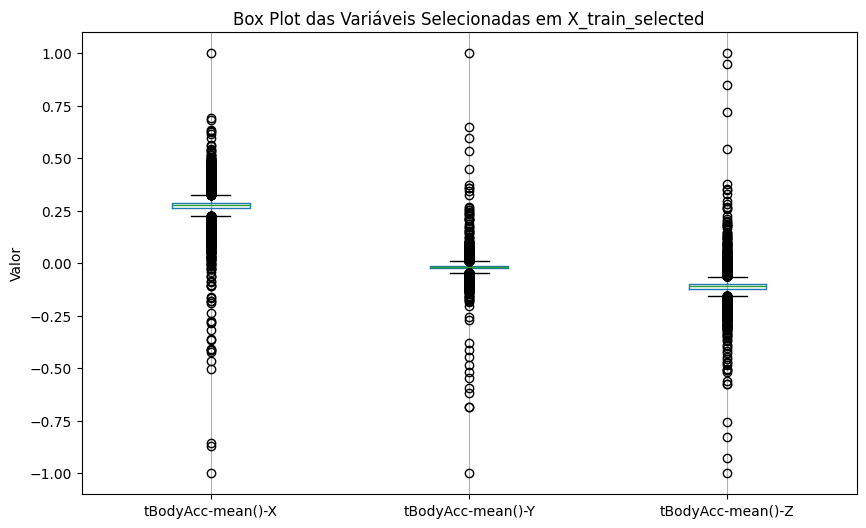

In [169]:
# Plotting box plots for the selected features in X_train_selected
plt.figure(figsize=(10, 6))
X_train_selected.boxplot(column=X_train_selected.columns.tolist())
plt.title('Box Plot das Variáveis Selecionadas em X_train_selected')
plt.ylabel('Valor')
plt.grid(axis='y')
plt.show()

In [152]:
# 5. Salvar em CSV
train_df.to_csv('train_df_processed.csv')
test_df.to_csv('test_df_processed.csv')
print("Bases salvas em CSV.")


Bases salvas em CSV.


In [171]:
# 6. Selecionar apenas as 3 colunas especificadas
selected_features = ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z']
X_train_selected = train_df[selected_features]
X_test_selected = test_df[selected_features]
y_train = train_df['activity']
y_test = test_df['activity']
print("Selecionadas as 3 colunas.")
display(X_train_selected.head())

Selecionadas as 3 colunas.


,,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z
registro,individuo,,,
0,1,0.288585,-0.020294,-0.132905
1,1,0.278419,-0.016411,-0.123520
2,1,0.279653,-0.019467,-0.113462
3,1,0.279174,-0.026201,-0.123283
4,1,0.276629,-0.016570,-0.115362


In [154]:
# 7. Verificar dados ausentes e zeros (boa prática)
print("Valores ausentes em X_train_selected:", X_train_selected.isnull().sum().sum())
print("Valores ausentes em X_test_selected:", X_test_selected.isnull().sum().sum())
print("Zeros em X_train_selected:", (X_train_selected == 0).sum().sum())
print("Zeros em X_test_selected:", (X_test_selected == 0).sum().sum())
print("Não há ausentes; zeros são valores válidos, sem necessidade de tratamento.")


Valores ausentes em X_train_selected: 0
Valores ausentes em X_test_selected: 0
Zeros em X_train_selected: 0
Zeros em X_test_selected: 0
Não há ausentes; zeros são valores válidos, sem necessidade de tratamento.


In [155]:
# 8. Otimizar tipos de dados para eficiência
X_train_selected = X_train_selected.astype('float32')
X_test_selected = X_test_selected.astype('float32')
y_train = y_train.astype('int8')
y_test = y_test.astype('int8')
print("Otimização de memória aplicada.")

Otimização de memória aplicada.


In [156]:
# 9. Ajustar árvore inicial e calcular ccp_alphas (Exercício 2)
dt = DecisionTreeClassifier(min_samples_leaf=20, random_state=123)
path = dt.cost_complexity_pruning_path(X_train_selected, y_train)
ccp_alphas = np.unique(path.ccp_alphas[path.ccp_alphas >= 0])
print("ccp_alphas calculados (positivos e únicos):")
display(ccp_alphas)

# Subconjunto: a cada 5 valores
ccp_alphas_subset = ccp_alphas[::5]
print("Subconjunto de ccp_alphas:")
display(ccp_alphas_subset)

ccp_alphas calculados (positivos e únicos):


array([0.00000000e+00, 6.96674540e-06, 1.12766571e-05, 2.02554065e-05,
       2.72034820e-05, 2.84988860e-05, 4.63397246e-05, 5.35004552e-05,
       5.84401136e-05, 6.17808017e-05, 6.59866112e-05, 6.73768888e-05,
       7.02851049e-05, 7.74168145e-05, 7.99585551e-05, 8.01474017e-05,
       8.28222484e-05, 8.29342439e-05, 8.49667199e-05, 9.21474511e-05,
       9.63598696e-05, 1.02953015e-04, 1.04280015e-04, 1.05722623e-04,
       1.06211126e-04, 1.10109332e-04, 1.20580361e-04, 1.24186720e-04,
       1.32053657e-04, 1.35233977e-04, 1.36017410e-04, 1.41963138e-04,
       1.46351627e-04, 1.47352194e-04, 1.49492770e-04, 1.50482754e-04,
       1.51968146e-04, 1.55713461e-04, 1.60511546e-04, 1.60628990e-04,
       1.64239147e-04, 1.67323005e-04, 1.74342668e-04, 1.74907961e-04,
       1.75578030e-04, 1.78985873e-04, 1.81439304e-04, 1.85996704e-04,
       1.87333070e-04, 1.89065980e-04, 1.89796602e-04, 1.96526409e-04,
       1.96759215e-04, 2.01481091e-04, 2.01919050e-04, 2.02866775e-04,
      

Subconjunto de ccp_alphas:


array([0.00000000e+00, 2.84988860e-05, 6.59866112e-05, 8.01474017e-05,
       9.63598696e-05, 1.10109332e-04, 1.36017410e-04, 1.50482754e-04,
       1.64239147e-04, 1.78985873e-04, 1.89796602e-04, 2.02866775e-04,
       2.05459167e-04, 2.10826986e-04, 2.24338271e-04, 2.34736716e-04,
       2.46942952e-04, 2.52748189e-04, 2.62429695e-04, 2.72574572e-04,
       2.77215101e-04, 2.85662581e-04, 3.05722978e-04, 3.24609474e-04,
       3.43367509e-04, 3.63559867e-04, 3.96370888e-04, 4.25042852e-04,
       4.49467013e-04, 4.59401439e-04, 4.83849967e-04, 5.11220249e-04,
       5.25236832e-04, 5.51314848e-04, 6.15435247e-04, 6.98447125e-04,
       7.30780896e-04, 8.36454145e-04, 9.07569250e-04, 1.01949772e-03,
       1.19311982e-03, 1.60586535e-03, 1.90309251e-03, 2.55472274e-03,
       2.90352390e-03, 4.40039449e-03, 7.39929073e-03])

In [157]:
# 10. Treinar árvores para cada alpha (Exercício 3.1)
%%time
clfs = []
for ccp_alpha in ccp_alphas_subset:
    clf = DecisionTreeClassifier(min_samples_leaf=20, random_state=123, ccp_alpha=ccp_alpha)
    clf.fit(X_train_selected, y_train)
    clfs.append(clf)
print(f"Treinadas {len(clfs)} árvores.")


Treinadas 47 árvores.
CPU times: user 2.05 s, sys: 3.09 ms, total: 2.05 s
Wall time: 2.14 s


In [158]:
# 10. Treinar árvores para cada alpha (Exercício 3.1)
%%time
clfs = []
for ccp_alpha in ccp_alphas_subset:
    clf = DecisionTreeClassifier(min_samples_leaf=20, random_state=123, ccp_alpha=ccp_alpha)
    clf.fit(X_train_selected, y_train)
    clfs.append(clf)
print(f"Treinadas {len(clfs)} árvores.")


Treinadas 47 árvores.
CPU times: user 1.97 s, sys: 177 µs, total: 1.97 s
Wall time: 1.97 s


In [159]:

# 11. Calcular acurácias (Exercício 3.2)
%%time
train_scores = [clf.score(X_train_selected, y_train) for clf in clfs]
test_scores = [clf.score(X_test_selected, y_test) for clf in clfs]
print("Acurácias calculadas.")

Acurácias calculadas.
CPU times: user 215 ms, sys: 0 ns, total: 215 ms
Wall time: 215 ms


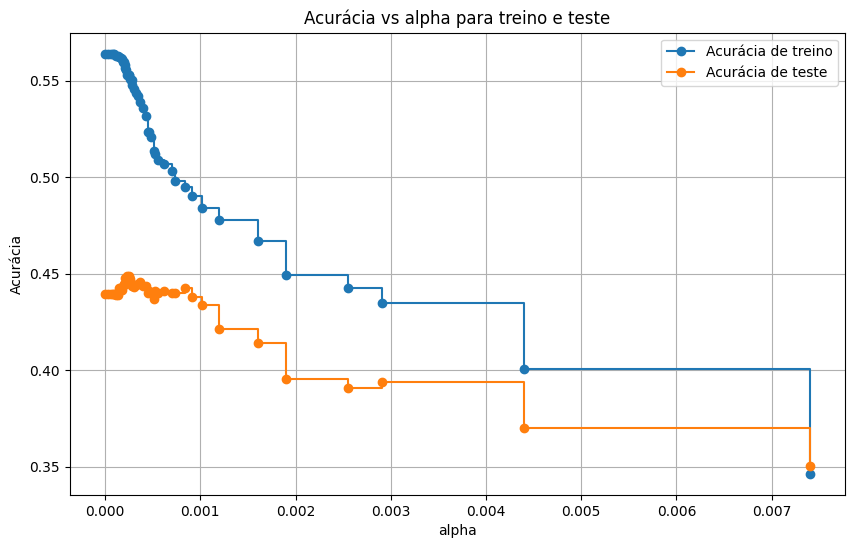

In [160]:
# 12. Plotar acurácias (Exercício 3.3)
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(ccp_alphas_subset, train_scores, marker='o', label='Acurácia de treino', drawstyle="steps-post")
ax.plot(ccp_alphas_subset, test_scores, marker='o', label='Acurácia de teste', drawstyle="steps-post")
ax.set_xlabel('alpha')
ax.set_ylabel('Acurácia')
ax.set_title('Acurácia vs alpha para treino e teste')
ax.grid(True)
ax.legend()
plt.show()

In [161]:
# 13. Selecionar melhor árvore (Exercício 3.4) e melhor acurácia (3.5)
best_tree_index = np.argmax(test_scores)
best_ccp_alpha = ccp_alphas_subset[best_tree_index]
best_clf = clfs[best_tree_index]
best_accuracy = test_scores[best_tree_index]
print(f"Melhor ccp_alpha: {best_ccp_alpha}")
print(f"Melhor acurácia no teste: {best_accuracy:.4f}")

Melhor ccp_alpha: 0.0002347367158915606
Melhor acurácia no teste: 0.4486


In [168]:
display(X_train_selected.describe())

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z
count,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141
std,0.070261,0.040810,0.056635
min,-1.000000,-1.000000,-1.000000
25%,0.262975,-0.024863,-0.120993
50%,0.277193,-0.017219,-0.108676
75%,0.288461,-0.010783,-0.097794
max,1.000000,1.000000,1.000000


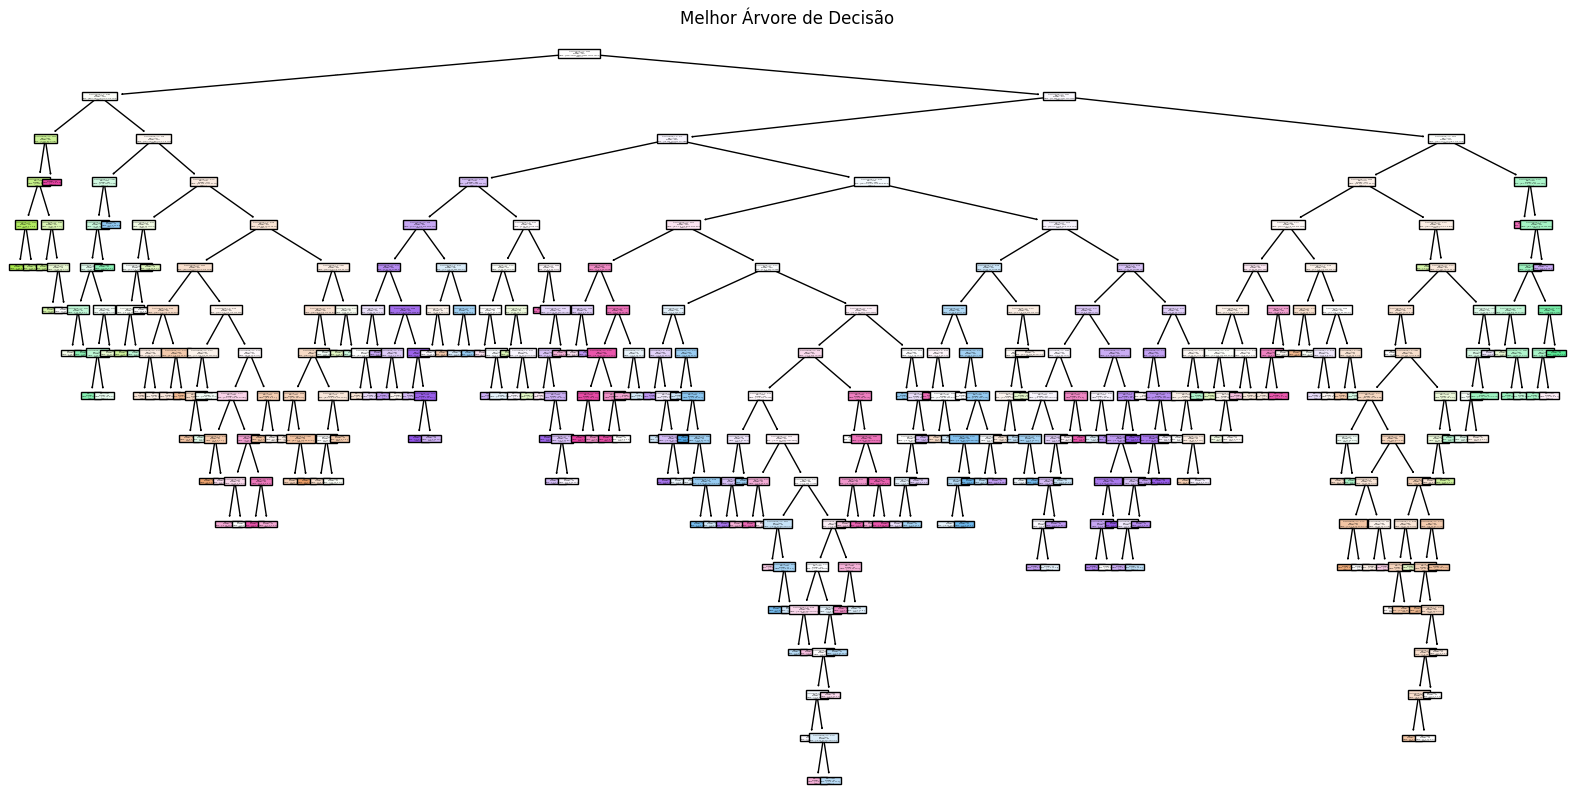

In [165]:

# 14. Visualizar a melhor árvore (opcional, para inspeção)
plt.figure(figsize=(20,10))
plot_tree(best_clf, feature_names=selected_features, class_names=[str(i) for i in range(1,7)], filled=True)
plt.title("Melhor Árvore de Decisão")
plt.show()


## Conclusão

Com base na análise realizada utilizando apenas as três variáveis selecionadas tBodyAcc-mean()-X, tBodyAcc-mean()-Y e tBodyAcc-mean()-Z e ajustando uma árvore de decisão com diferentes valores de ccp_alpha para controle da poda, obtivemos uma acurácia máxima no conjunto de teste de aproximadamente 44.86%.

Insights:

* Limitação das Variáveis: A acurácia de 44.86% sugere que as três variáveis selecionadas, embora relevantes, podem não ser suficientes para distinguir completamente entre as seis atividades humanas. É provável que outras variáveis na base de dados original (que foram excluídas neste exercício) contenham informações discriminatórias importantes para uma classificação mais precisa.
* Impacto da Poda: O gráfico de acurácia vs. ccp_alpha demonstra o efeito da poda na generalização do modelo. Inicialmente, o aumento do ccp_alpha (poda) tende a melhorar a acurácia no conjunto de teste, indicando que a árvore sem poda estava sobreajustada aos dados de treino. No entanto, um valor muito alto de ccp_alpha pode levar a uma árvore muito simples e subajustada, diminuindo a acurácia em ambos os conjuntos.
* Potencial de Melhoria: Para obter uma acurácia significativamente maior, seria necessário:
    * Incluir mais variáveis: Utilizar um conjunto maior das 561 variáveis disponíveis na base de dados original.
    * Explorar outros modelos: Testar outros algoritmos de classificação que podem ser mais adequados para este tipo de dados (por exemplo, Random Forest, Gradient Boosting, SVM, Redes Neurais).
    * Otimizar hiperparâmetros: Realizar uma busca mais completa pelos melhores hiperparâmetros para a árvore de decisão (além do ccp_alpha), como max_depth, min_samples_split, etc.
    * Considerar a estrutura temporal: A base de dados possui uma natureza temporal (registros sequenciais). Modelos que levam em conta a sequência dos dados (como LSTMs ou outras redes neurais recorrentes) podem ser mais eficazes.

**Resumo**

A análise com as três variáveis forneceu um ponto de partida e demonstrou o processo de ajuste e poda de árvores de decisão. No entanto, para alcançar um modelo robusto e com alta acurácia na classificação de atividades humanas, seria essencial incorporar um conjunto de features mais rico e explorar modelos mais complexos.